In [6]:
# !pip install pdf2image
# !pip install python-poppler
# !sudo apt install poppler-utils
# !pip install PyPDF2

In [1]:
import pandas as pd
from pdf2image import convert_from_path
from IPython.display import Image
from PyPDF2 import PdfReader
import os

In [ ]:
os.mkdir("data/books/imgs/book6")

In [21]:

def get_page_len(pdf_file_path : str) -> int:
    with open(pdf_file_path, 'rb') as file:
        reader = PdfReader(file)
        return len(reader.pages)
    
get_page_len('data/books/book1.pdf')

194

In [22]:
def extract_book_screenshots(book_num : int = 1):
    number_of_pages = get_page_len(f'data/books/book{book_num}.pdf')
    
    for page in range(1, number_of_pages+1):
        images = convert_from_path(f'data/books/book{book_num}.pdf', first_page=page, last_page=page)
        if images:
            image = images[0]
            image.save(f'data/books/imgs/book{book_num}/page{page}.png')
            print(f'saved: data/books/imgs/book{book_num}/page{page}.png', " "*30, end='\r')

    print(f"Finished book: {book_num}", " "* 40)

In [24]:
for book in range(2, 7):
    extract_book_screenshots(book_num=book)

Finished book: 2                                                       
Finished book: 3                                                       
Finished book: 4                                                       
Finished book: 5                                                       
Finished book: 6                                                       


In [4]:
def get_book_screenshot_data(start_page : int = 9, book : int = 2) -> pd.DataFrame:
    book_data = {'wordlist_photo1' : [],
             'wordlist_photo2' : [],
             'exercise_photo1' : [],
             'exercise_photo2' : [],
             'story_photo' : [],
             'story_exercise_photo' : [],
             'unit' : [],
             'book' : []
            }
    unit = 0
    for page in range(start_page, 6 * 30 + start_page, 6):
        unit += 1
        # print(unit)
    
        pages = [n for n in range(page, page+6)]
        # print(pages)

        book_data['unit'].append(unit)
        book_data['book'].append(book)
        book_data['wordlist_photo1'].append(pages[0])
        book_data['wordlist_photo2'].append(pages[1])
    
        book_data['exercise_photo1'].append(pages[2])
        book_data['exercise_photo2'].append(pages[3])
    
        book_data['story_photo'].append(pages[4])
        book_data['story_exercise_photo'].append(pages[5])
    return pd.DataFrame(book_data)

In [5]:
books_data = []
for book, start_page in {1:7, 2:9, 3:9, 4:10, 5:10, 6:10}.items():
    books_data.append(get_book_screenshot_data(start_page = start_page, book=book))


In [6]:
data = pd.concat(books_data, ignore_index=True)
data

,wordlist_photo1,wordlist_photo2,exercise_photo1,exercise_photo2,story_photo,story_exercise_photo,unit,book
0,7,8,9,10,11,12,1,1
1,13,14,15,16,17,18,2,1
2,19,20,21,22,23,24,3,1
3,25,26,27,28,29,30,4,1
4,31,32,33,34,35,36,5,1
...,...,...,...,...,...,...,...,...
175,160,161,162,163,164,165,26,6
176,166,167,168,169,170,171,27,6
177,172,173,174,175,176,177,28,6
178,178,179,180,181,182,183,29,6


In [7]:
data.to_csv("screenshots.csv", index_label=False)

In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 180 entries, 0 to 29
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   wordlist_photo1       180 non-null    int64
 1   wordlist_photo2       180 non-null    int64
 2   exercise_photo1       180 non-null    int64
 3   exercise_photo2       180 non-null    int64
 4   story_photo           180 non-null    int64
 5   story_exercise_photo  180 non-null    int64
 6   unit                  180 non-null    int64
 7   book                  180 non-null    int64
dtypes: int64(8)
memory usage: 12.7 KB


In [41]:
data[data.loc[:,'book'] == 6]

,wordlist_photo1,wordlist_photo2,exercise_photo1,exercise_photo2,story_photo,story_exercise_photo,unit,book
0,10,11,12,13,14,15,1,6
1,16,17,18,19,20,21,2,6
2,22,23,24,25,26,27,3,6
3,28,29,30,31,32,33,4,6
4,34,35,36,37,38,39,5,6
5,40,41,42,43,44,45,6,6
6,46,47,48,49,50,51,7,6
7,52,53,54,55,56,57,8,6
8,58,59,60,61,62,63,9,6
9,64,65,66,67,68,69,10,6


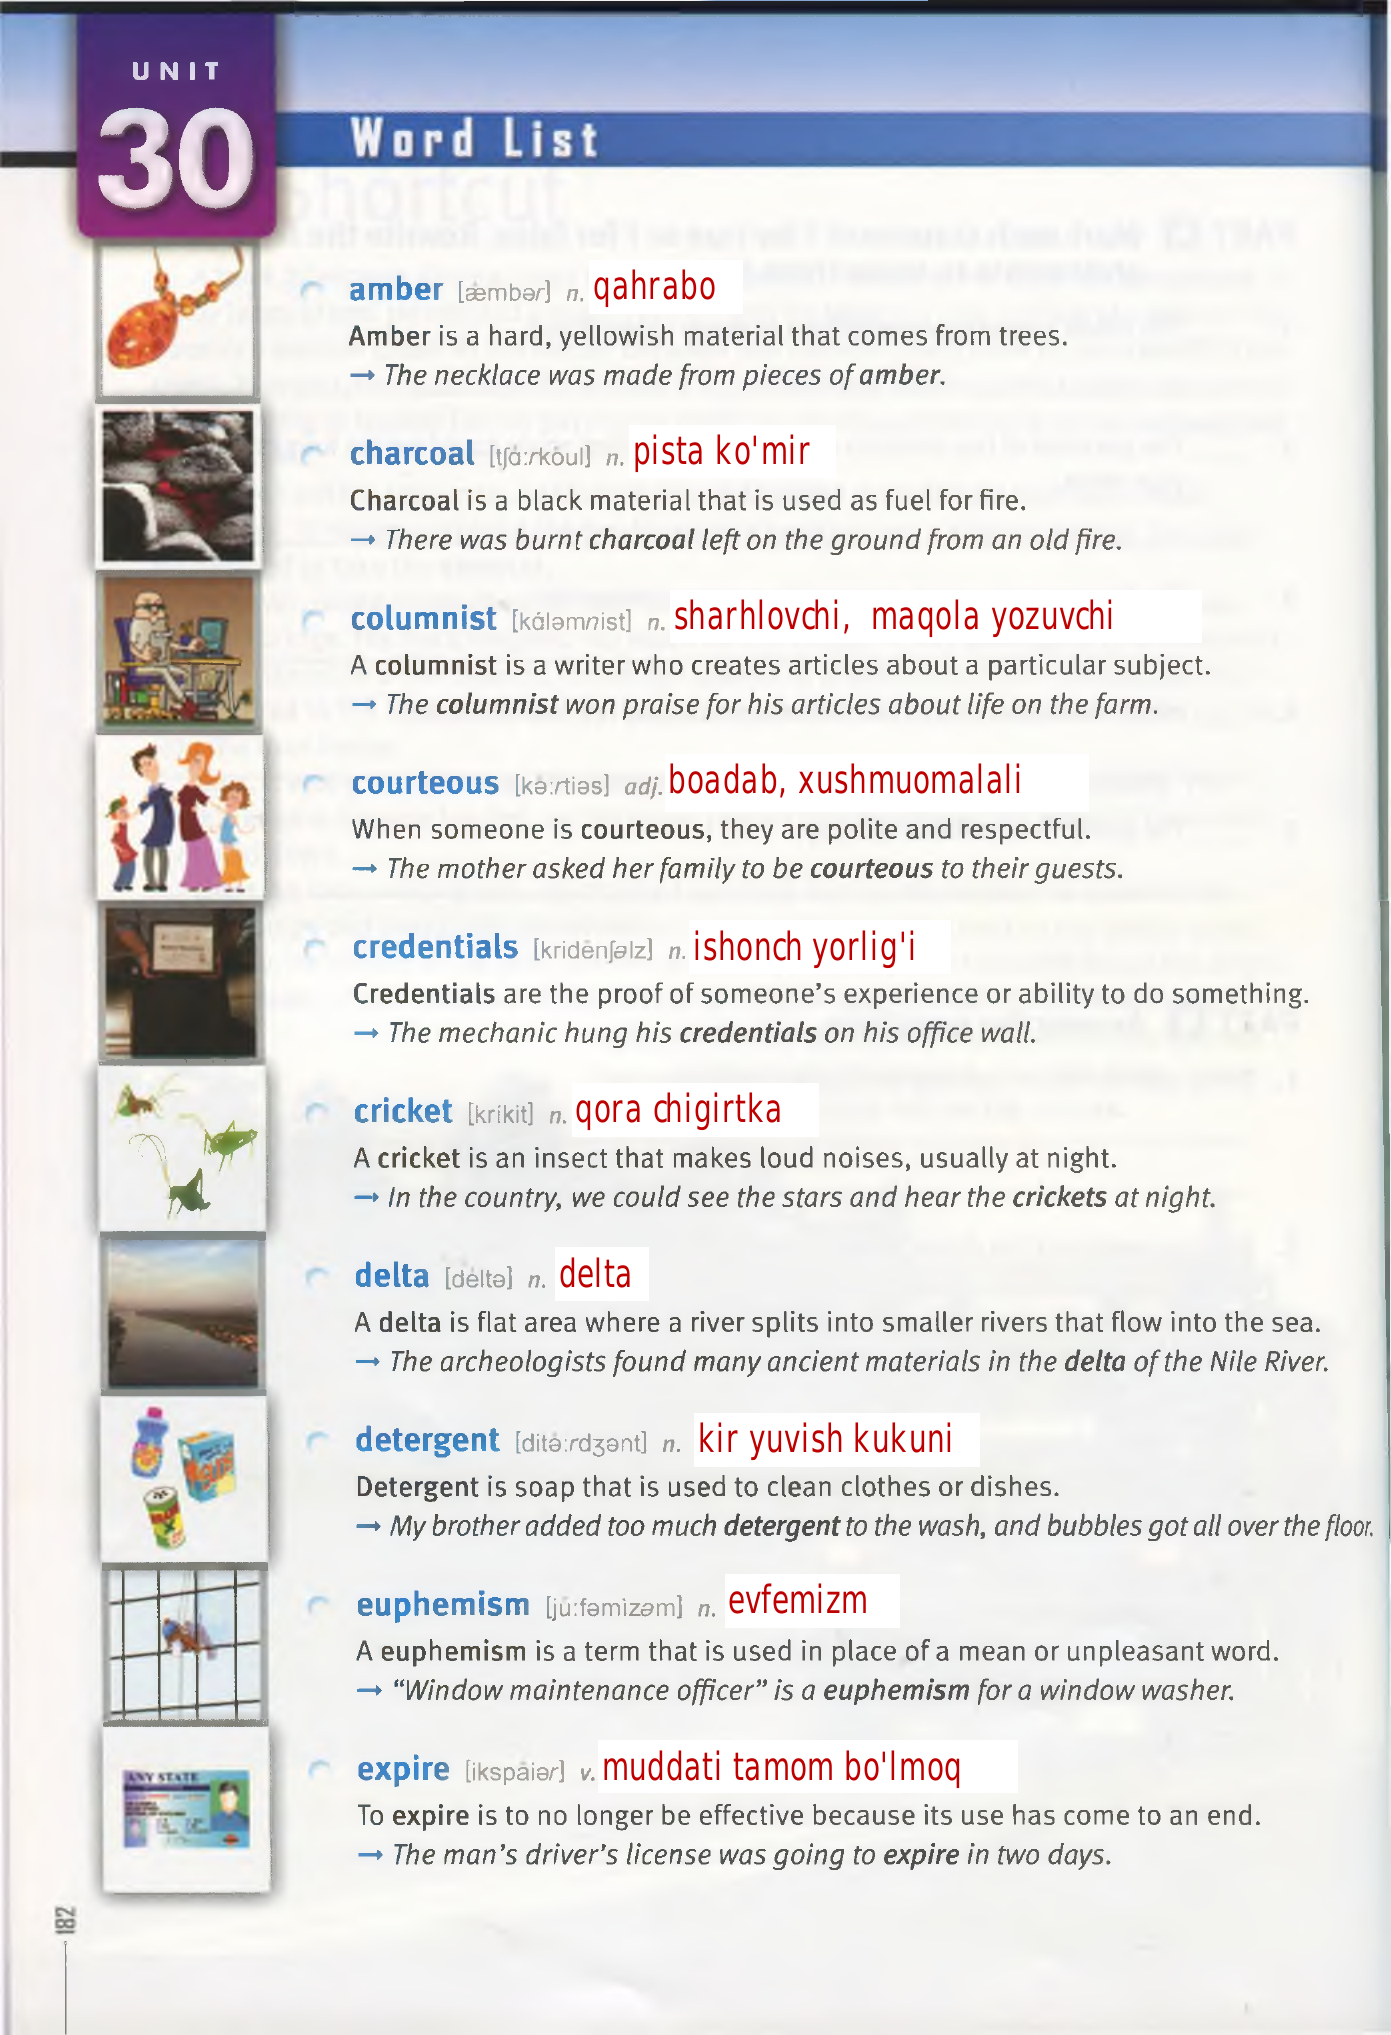

In [44]:
Image('data/books/imgs/book6/page184.png')

In [27]:
df = pd.read_csv('screenshots2.csv')
df.head(40)

,wordlist_photo1,wordlist_photo2,exercise_photo1,exercise_photo2,story_photo,story_exercise_photo,unit,book,wordlist_photo1_data_id,wordlist_photo2_data_id,exercise_photo1_data_id,exercise_photo2_data_id,story_photo_data_id,story_exercise_photo_data_id
0,7,8,9,10,11,12,1,1,1563,1566,1568,1570,1572,1575
1,13,14,15,16,17,18,2,1,1577,1580,1582,1584,1586,1588
2,19,20,21,22,23,24,3,1,1591,1593,1595,1597,1600,1602
3,25,26,27,28,29,30,4,1,1605,1607,1618,1620,1623,1625
4,31,32,33,34,35,36,5,1,1628,1630,1633,1635,1638,1640
5,37,38,39,40,41,42,6,1,1643,1645,1647,1649,1651,1654
6,43,44,45,46,47,48,7,1,1656,1659,1661,1663,1665,1667
7,49,50,51,52,53,54,8,1,1670,1672,1674,1676,1678,1680
8,55,56,57,58,59,60,9,1,1682,1684,1686,1689,1691,1693
9,61,62,63,64,65,66,10,1,1696,1698,1700,1703,1705,1707


In [74]:
screenshot = df[(df['book'] == 4) & (df['unit'] == 30)]

In [75]:
dd = screenshot.to_dict()
dd

{'wordlist_photo1': {119: 184},
 'wordlist_photo2': {119: 185},
 'exercise_photo1': {119: 186},
 'exercise_photo2': {119: 187},
 'story_photo': {119: 188},
 'story_exercise_photo': {119: 189},
 'unit': {119: 30},
 'book': {119: 4},
 'wordlist_photo1_data_id': {119: 3577},
 'wordlist_photo2_data_id': {119: 3578},
 'exercise_photo1_data_id': {119: 3580},
 'exercise_photo2_data_id': {119: 3582},
 'story_photo_data_id': {119: 3585},
 'story_exercise_photo_data_id': {119: 3587}}

In [73]:
[n for n in dd['wordlist_photo2_data_id'].values()][0]

1833